In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt


### Value of events

In [108]:
dm = pd.read_csv('out_data/pbpmerge.csv')
dm = dm.drop('Unnamed: 0', axis=1)

In [109]:
dm = dm[['Season', 'GameNumber', 'EventNumber', 'Period', 'AdvantageType','EventTimeFromZero', 'EventTimeFromTwenty', 'EventType', 'EventDetail']]

In [110]:
dm = dm[dm['AdvantageType']=='EV']

In [111]:
dm = dm.sort_values(by=['Season', 'GameNumber', 'EventNumber'])

In [112]:
dm = dm.set_index(['Season', 'GameNumber'])

In [113]:
dm['time_global'] = dm.EventTimeFromZero + (dm.Period-1)*dm.EventTimeFromZero

In [114]:
dm['goal_time'] = np.where(dm['EventType'] == 'GOAL', dm.time_global, np.nan)
dm['goal_time'] = dm['goal_time'].fillna(method='backfill')

In [121]:
dm['time_from_goal'] = dm['goal_time'] - dm['time_global']
dm['time_from_goal']  = np.where(dm['time_from_goal']<0, np.nan, dm['time_from_goal'])

In [124]:
dm['ishit'] = np.where(dm['EventType'] == 'HIT', 1, 0)
dm['isfac'] = np.where(dm['EventType'] == 'FAC', 1, 0)


In [127]:
dc = dm.groupby(['time_from_goal'])['ishit', 'isfac'].sum()

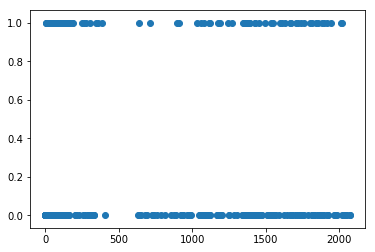

In [128]:

y = dm.ishit
x = dm.time_from_goal
plt.scatter(x, y)
plt.show()

In [80]:
dm.head()

Period AdvantageType  EventTimeFromZero  \
Season GameNumber EventNumber                                            
2010   20001      1.0               1            EV                  0   
                  3.0               1            EV                 15   
                  4.0               1            EV                 46   
                  5.0               1            EV                 57   
                  6.0               1            EV                 69   

                               EventTimeFromTwenty EventType  \
Season GameNumber EventNumber                                  
2010   20001      1.0                       1200.0       FAC   
                  3.0                       1185.0       HIT   
                  4.0                       1154.0       HIT   
                  5.0                       1143.0       HIT   
                  6.0                       1131.0      GIVE   

                                                                     EventDetail  \
Season GameNumber EventNumber                                                      
2010   20001      1.0          MTL won Neu. Zone - MTL #11 GOMEZ vs TOR #37 B...   
                  3.0                TOR #37 BRENT HIT MTL #26 GORGES, Off. Zone   
                  4.0              MTL #14 PLEKANEC HIT TOR #2 SCHENN, Off. Zone   
                  5.0              MTL #76 SUBBAN HIT TOR #15 KABERLE, Neu. Zone   
                  6.0                 TOR&nbsp;GIVEAWAY - #35 GIGUERE, Def. Zone   

                               time_global  goal  goal_time  time_from_goal  \
Season GameNumber EventNumber                                                 
2010   20001      1.0                    0     0      402.0           402.0   
                  3.0                   15     0      402.0           387.0   
                  4.0                   46     0      402.0           356.0   
                  5.0                   57     0      402.0           345.0   
                  6.0                   69     0      402.0           333.0   

                               ishit  isfac  
Season GameNumber EventNumber                
2010   20001      1.0              0      1  
                  3.0              1      0  
                  4.0              1      0  
                  5.0              1      0  
                  6.0              0      0